# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

The questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Which animal is most prevalent and what is their distribution amongst parks?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sp = pd.read_csv("species_info.csv")
ob = pd.read_csv("observations.csv")

In [3]:
sp.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [4]:
ob.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [5]:
unique_species = np.unique(sp.scientific_name)
print(len(unique_species))
unique_species2 = np.unique(ob.scientific_name)
print(len(unique_species2))

5541
5541


In [6]:
sp.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [7]:
ob.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

In [8]:
print(np.unique(sp.category))

['Amphibian' 'Bird' 'Fish' 'Mammal' 'Nonvascular Plant' 'Reptile'
 'Vascular Plant']


In [9]:
sp.category.value_counts(dropna = False)

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [10]:
ob.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [11]:
sp.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [12]:
sp.conservation_status.fillna("species without concerns", inplace = True)

In [13]:
np.unique(sp.conservation_status)

array(['Endangered', 'In Recovery', 'Species of Concern', 'Threatened',
       'species without concerns'], dtype=object)

In [14]:
np.unique(sp.category)

array(['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant',
       'Reptile', 'Vascular Plant'], dtype=object)

In [15]:
dnme = sp.groupby("category")
dnme.get_group("Mammal")

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,species without concerns
1,Mammal,Bos bison,"American Bison, Bison",species without concerns
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",species without concerns
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",species without concerns
4,Mammal,Cervus elaphus,Wapiti Or Elk,species without concerns
...,...,...,...,...
4499,Mammal,Sorex lyelli,Mount Lyell Shrew,species without concerns
4500,Mammal,Sorex monticolus,Montane Shrew,species without concerns
4501,Mammal,Sorex tenellus,Inyo Shrew,species without concerns
4502,Mammal,Sorex trowbridgii,Trowbridge's Shrew,species without concerns


In [16]:
conservationCategory = sp[sp.conservation_status != "species without concerns"]\
                       .groupby(["conservation_status", "category"])["scientific_name"]\
                       .count()\
                       .unstack()
conservationCategory.head(25)

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


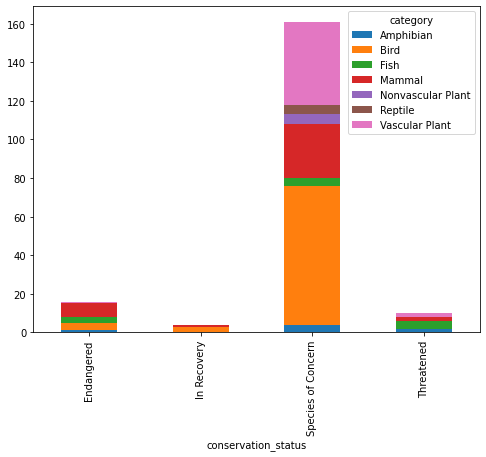

In [17]:
ax = conservationCategory.plot(kind = "bar", stacked = True, figsize = (8, 6))

In [18]:
end_animals = sp[sp.conservation_status == "Endangered"]
end_animals.category.value_counts()

Mammal            7
Bird              4
Fish              3
Vascular Plant    1
Amphibian         1
Name: category, dtype: int64

In [22]:
try1 = ob.merge(sp, on=["scientific_name"])
try1.head(25)

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",species without concerns
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",species without concerns
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",species without concerns
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",species without concerns
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,species without concerns
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,species without concerns
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,species without concerns
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,species without concerns
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,species without concerns
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Klamath Plum,species without concerns


In [25]:
ob.park_name.value_counts()

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64

In [32]:
sorted_df = try1.sort_values(by = "observations", ascending = False)

In [37]:
sorted_df[sorted_df.park_name == "Great Smoky Mountains National Park"].head(5)

,scientific_name,park_name,observations,category,common_names,conservation_status
22356,Sonchus asper ssp. asper,Great Smoky Mountains National Park,147,Vascular Plant,Spiny Sowthistle,species without concerns
17522,Lespedeza violacea,Great Smoky Mountains National Park,146,Vascular Plant,Violet Bush-Clover,species without concerns
15647,Botrychium dissectum,Great Smoky Mountains National Park,144,Vascular Plant,"Cutleaf Grape-Fern, Cut-Leaved Grape Fern",species without concerns
9354,Festuca subulata,Great Smoky Mountains National Park,141,Vascular Plant,"Bearded Fescue, Nodding Fescue",species without concerns
15374,Branta hutchinsii,Great Smoky Mountains National Park,139,Bird,Cackling Goose,species without concerns


In [38]:
sorted_df[sorted_df.park_name == "Yosemite National Park"].head(5)

,scientific_name,park_name,observations,category,common_names,conservation_status
14193,Ivesia shockleyi var. shockleyi,Yosemite National Park,223,Vascular Plant,"Shockley's Ivesia, Sky Mousetail",species without concerns
16978,Lipocarpha micrantha,Yosemite National Park,222,Vascular Plant,"Dwarf Bulrush, Smallflower Halfchaff Sedge, Sm...",species without concerns
17739,Artemisia arbuscula ssp. arbuscula,Yosemite National Park,219,Vascular Plant,"Gray Low Sagebrush, Little Sagebrush",species without concerns
7308,Trillium rugelii,Yosemite National Park,219,Vascular Plant,Southern Nodding Trillium,species without concerns
10267,Castilleja pallescens,Yosemite National Park,214,Vascular Plant,"Pale Indian Paintbrush, Pale Paintbrush",species without concerns


In [39]:
sorted_df[sorted_df.park_name == "Bryce National Park"].head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
17121,Valerianella radiata,Bryce National Park,176,Vascular Plant,"Beaked Corn-Salad, Corn Salad",species without concerns
16155,Melilotus indica,Bryce National Park,173,Vascular Plant,Sourclover,species without concerns
23525,Ericameria bloomeri,Bryce National Park,172,Vascular Plant,"Bloomer's Goldenbush, Rabbitbush",species without concerns
1737,Draba oligosperma,Bryce National Park,167,Vascular Plant,"Fewseed Draba, Glacier Draba",species without concerns
20716,Martes americana,Bryce National Park,167,Mammal,Pine Marten,species without concerns
20717,Martes americana,Bryce National Park,167,Mammal,"American Marten, Marten",species without concerns
19010,Bubulcus ibis,Bryce National Park,164,Bird,"Cattle Egret, Western Cattle Egret",species without concerns
12940,Avena sativa,Bryce National Park,163,Vascular Plant,"Cultivated Oat, Oats",species without concerns
12941,Avena sativa,Bryce National Park,163,Vascular Plant,"Common Oat, Common Oats, Oat, Oatgrass (Common...",species without concerns
16530,Trillium simile,Bryce National Park,162,Vascular Plant,Sweet White Trillium,species without concerns


In [40]:
sorted_df[sorted_df.park_name == "Yellowstone National Park"].head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
11629,Lycopodium tristachyum,Yellowstone National Park,321,Vascular Plant,"Deep-Root Clubmoss, Ground Cedar",species without concerns
5512,Castilleja miniata,Yellowstone National Park,317,Vascular Plant,"Giant Red Indian Paintbrush, Great Red Indian ...",species without concerns
3375,Cryptantha fendleri,Yellowstone National Park,316,Vascular Plant,"Fendler's Cryptantha, Sanddune Catseye, Sanddu...",species without concerns
22240,Dracocephalum parviflorum,Yellowstone National Park,316,Vascular Plant,American Dragonhead,species without concerns
20346,Bidens tripartita,Yellowstone National Park,314,Vascular Plant,"Stick-Tight, Three-Lobe Beggar-Ticks",species without concerns
20347,Bidens tripartita,Yellowstone National Park,314,Vascular Plant,"Threelobe Beggarticks, Three-Lobe Beggarticks",species without concerns
14328,Polemonium reptans,Yellowstone National Park,312,Vascular Plant,"Greek Valerian, Greek Valerian, Jacob's Ladder",species without concerns
7812,Schoenoplectus tabernaemontani,Yellowstone National Park,312,Vascular Plant,"Great Bulrush, Softstem Bulrush, Soft-Stem Bul...",species without concerns
15414,Ludwigia palustris,Yellowstone National Park,310,Vascular Plant,Water Purslane,species without concerns
15415,Ludwigia palustris,Yellowstone National Park,310,Vascular Plant,"Marsh Primrose-Willow, Marsh Seedbox",species without concerns
